0.9687157938184311
0.9751779745865785
0.027669068389850948


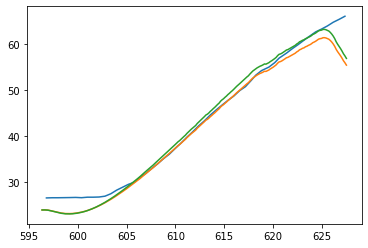

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from parseTxt import modelTune
from scipy.interpolate import interp1d
import random


def calculation(T0,offset,someTemp,lam,time):                               #someTemp is either thermistor temp or set temp

    return (-someTemp+offset+T0)*np.exp(-lam*(time))+someTemp-offset

def off(someTemp):
    
    a = -0.0013693467336683212
    b = 0.2659547738693443
    c = -3.881909547738627
    return a*someTemp**2+b*someTemp+c

def r2(y,fit):
    st = sum((y-np.average(y))**2)
    sr = sum((y-fit)**2)
    r2 = 1-sr/st
    return r2

file = 'revertModel1.txt'
fullData = modelTune(file)
therm = [np.array(fullData[i][1][0]) for i in range(len(fullData))]
samp = [np.array(fullData[i][0][0]) for i in range(len(fullData))]
mod = [np.array(fullData[i][1][1]) for i in range(len(fullData))]
sampTime = [np.array(fullData[i][0][1]) for i in range(len(fullData))]
time = [np.array(fullData[i][1][2]) for i in range(len(fullData))]

mod.append([24])
section = 0
test = calculation(mod[section-1][-1],off(therm[section]),therm[section],0.0259,time[section]-time[section][0]-5)
testInterp = interp1d(time[section],test)(sampTime[section])



# print(testInterp(sampTime[section]))
# testInterp = testInterp(sampTime[section])


monteCarlo = np.random.uniform(0,1,10000)
print(r2(samp[section],testInterp))
rr = {}
for i in monteCarlo:
    test3 = calculation(mod[section-1][-1],off(therm[section]),therm[section],i,time[section]-time[section][0]-5)
    testInterp = interp1d(time[section],test3)(sampTime[section])
    rr[r2(samp[section],testInterp)] = i

test2 = calculation(mod[section-1][-1],off(therm[section]),therm[section],rr[max(rr.keys())],time[section]-time[section][0]-5)
print(max(rr.keys()))
print(rr[max(rr.keys())])
# plt.plot(time[section],therm[section])
# plt.plot(time[section],mod[section])
plt.plot(sampTime[section],samp[section])
plt.plot(time[section],test)
plt.plot(time[section],test2)
# plt.plot(sampTime[section],testInterp(sampTime[section]))
plt.show()



In [ ]:
monteCarlo = np.random.uniform(0,1,10000)
print(r2(samp[section],testInterp))
rr = {}
for i in monteCarlo:
    test3 = calculation(mod[section-1][-1],off(therm[section]),therm[section],i,time[section]-time[section][0]-5)
    testInterp = interp1d(time[section],test3)(sampTime[section])
    rr[r2(samp[section],testInterp)] = i